In [80]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam


In [81]:
# Load the dataset
data = pd.read_csv('/content/house_price.csv')

# Assuming 'price' is the target variable
X = data.drop('price', axis=1)
y = data['price']


In [82]:
print(data.head())

   id    price  lotsize  bedrooms  bathrms  stories  driveway  recroom  \
0   1  42000.0     5850         3        1        2         1        0   
1   2  38500.0     4000         2        1        1         1        0   
2   3  49500.0     3060         3        1        1         1        0   
3   4  60500.0     6650         3        1        2         1        1   
4   5  61000.0     6360         2        1        1         1        0   

   fullbase  gashw  airco  garagepl  prefarea  
0         1      0      0         1         0  
1         0      0      0         0         0  
2         0      0      0         0         0  
3         0      0      0         0         0  
4         0      0      0         0         0  


In [83]:

# Display the data types of each column
print(data.dtypes)

id            int64
price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway      int64
recroom       int64
fullbase      int64
gashw         int64
airco         int64
garagepl      int64
prefarea      int64
dtype: object


In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Convert pandas DataFrame to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

X_train_np = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
X_test_np = X_test_np.reshape((X_test_np.shape[0], 1, X_test_np.shape[1]))


In [89]:
# TensorFlow Multiple Linear Regression model
mlr_model = Sequential([
    Dense(units=1, input_dim=X_train.shape[1])
])

mlr_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the MLR model and include validation data
history_mlr = mlr_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
14/14 [==============================] - 1s 12ms/step - loss: 5553093120.0000 - val_loss: 4943428096.0000
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 5541428736.0000 - val_loss: 4933440000.0000
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 5529856000.0000 - val_loss: 4923321344.0000
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 5518575104.0000 - val_loss: 4913030144.0000
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 5506862080.0000 - val_loss: 4903032832.0000
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 5495324672.0000 - val_loss: 4893086208.0000
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 5483963392.0000 - val_loss: 4882945536.0000
Epoch 8/50
14/14 [==============================] - 0s 4ms/step - loss: 5472467456.0000 - val_loss: 4872910336.0000
Epoch 9/50
14/14 [==============================] - 0s 5ms/step - loss:

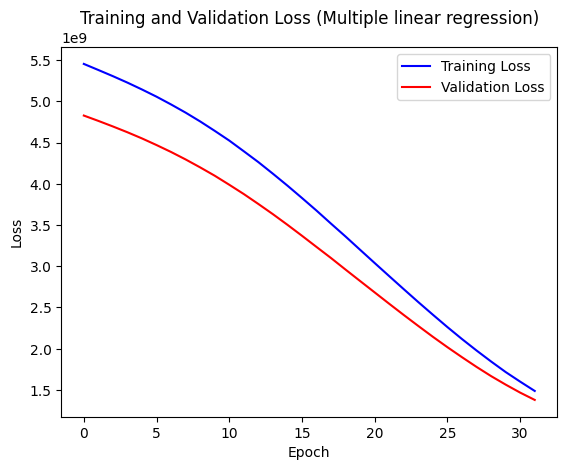

In [90]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (Multiple linear regression)")
plt.legend()
plt.show()